In [1]:
!nvidia-smi

Wed Jun 18 13:59:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Verify all files and directories

!ls /kaggle/input/waste-dataset3

!ls /kaggle/input/waste-dataset3/train
!ls /kaggle/input/waste-dataset3/val  
!ls /kaggle/input/waste-dataset3/test 

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  val
images	labels
images	labels
images	labels


In [3]:
#Install requirements
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [4]:
# Hyperparameter Tuning using custom search space to find best hyperparameter settings 

from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

search_space = {
    "hsv_h": (0.005, 0.02),
    "hsv_s": (0.3, 0.5),
    "hsv_v": (0.2, 0.4),
    "lr0": (1e-4, 5e-3)
}

model.tune(
    data="/kaggle/input/waste-dataset3/data.yaml",  
    epochs=8,            
    iterations=10,        
    imgsz=416,            
    optimizer="AdamW",    
    space=search_space,
    plots=False,
    save=False,
    val=False,            
    device=[0,1]          
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.1MB/s]

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'hsv_h': 0.015, 'hsv_s': 0.5, 'hsv_v': 0.4, 'lr0': 0.005}


Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/waste-dataset3/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimi

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 78.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.2 ms, read: 10.4±2.4 MB/s, size: 53.4 KB)


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:50<00:00, 221.54it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/waste-dataset3/val/labels... 23 images, 0 backgrounds, 0 corrupt:   3%|▎         | 23/800 [00:00<00:03, 212.83it/s]93.68it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.3±3.8 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:03<00:00, 213.65it/s].60it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 4538 images, 0 backgrounds, 0 corrupt:  40%|████      | 4538/11244 [00:05<00:07, 889.84it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:13<00:00, 851.83it/s]
        1/8     0.584G      1.506      2.292      1.527         30        416: 100%|██████████| 703/703 [01:51<00:00,  6.30it/s]
        2/8     0.584G      1.413      1.826      1.427         40        416:   0%|          | 1/703 [00:00<01:42,  6.84it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.588G       1.52       2.12      1.553         38        416: 100%|██████████| 703/703 [01:30<00:00,  7.74it/s]
        3/8     0.588G      1.726      2.049      1.703         38        416:   0%|          | 1/703 [00:00<01:19,  8.86it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.588G      1.459       1.98      1.506         12        416: 100%|██████████| 703/703 [01:29<00:00,  7.90it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.621G      1.396      1.794      1.468         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
        5/8     0.621G       1.15      2.125      1.483         19        416:   0%|          | 1/703 [00:00<01:12,  9.63it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.623G      1.335      1.674      1.431         19        416: 100%|██████████| 703/703 [01:24<00:00,  8.33it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.623G       1.29      1.565      1.403         24        416: 100%|██████████| 703/703 [01:24<00:00,  8.31it/s]
        7/8     0.623G      1.142      1.477      1.258         29        416:   0%|          | 1/703 [00:00<01:13,  9.57it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.623G      1.244      1.454      1.368         22        416: 100%|██████████| 703/703 [01:23<00:00,  8.47it/s]
        8/8     0.623G      1.486      1.637      1.648         49        416:   0%|          | 1/703 [00:00<01:18,  8.96it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.623G      1.184      1.353       1.34         36        416: 100%|██████████| 703/703 [01:28<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.55it/s]


                   all        800       2429      0.736      0.724       0.78       0.59

8 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 12.30it/s]


                   all        800       2429      0.737      0.724      0.781       0.59
            food_waste        358       1353      0.642      0.448       0.54      0.355
                 metal        177        270      0.631      0.863      0.836      0.708
                 paper        113        267      0.868      0.873      0.935      0.719
               plastic        263        539      0.804      0.712      0.811      0.577
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.5ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (842.06s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.60863 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.73581, 'metrics/recall(B)': 0.72429, 'metrics/mAP50(B)': 0.78049, 'metrics/mAP50-95(B)': 0.58954, 'val/box_loss': 1.06916, 'val/cls_l

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:14<00:00, 750.78it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/waste-dataset3/val/labels...:   0%|          | 0/800 [00:00<?, ?it/s]   1%|          | 96/11244 [00:00<00:11, 939.04it/s]

val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 95.2±32.3 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 628.27it/s]3.82it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:10<00:00, 1065.02it/s]
        1/8     0.559G       1.51      2.288      1.522         30        416: 100%|██████████| 703/703 [01:43<00:00,  6.78it/s]
        2/8     0.559G      1.522      1.719      1.561         40        416:   0%|          | 1/703 [00:00<01:35,  7.33it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G       1.53      2.116      1.552         38        416: 100%|██████████| 703/703 [01:28<00:00,  7.94it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.453      1.957      1.502         12        416: 100%|██████████| 703/703 [01:26<00:00,  8.10it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.397      1.796      1.461         17        416: 100%|██████████| 703/703 [01:26<00:00,  8.17it/s]
        5/8     0.596G      1.262      2.263      1.589         19        416:   0%|          | 1/703 [00:00<01:15,  9.26it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.344       1.67      1.429         19        416: 100%|██████████| 703/703 [01:26<00:00,  8.12it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.293       1.56      1.403         24        416: 100%|██████████| 703/703 [01:25<00:00,  8.22it/s]
        7/8     0.598G      1.173      1.586      1.301         29        416:   0%|          | 1/703 [00:00<01:13,  9.55it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G      1.239      1.446      1.366         22        416: 100%|██████████| 703/703 [01:26<00:00,  8.16it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.182      1.348      1.337         36        416: 100%|██████████| 703/703 [01:26<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.06it/s]


                   all        800       2429      0.764      0.699      0.778      0.579

8 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


                   all        800       2429      0.764      0.699      0.778      0.579
            food_waste        358       1353      0.659      0.427      0.543      0.356
                 metal        177        270      0.628      0.864      0.834      0.696
                 paper        113        267      0.926      0.849       0.93      0.694
               plastic        263        539      0.844      0.655      0.805      0.569
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 2/10 iterations complete ✅ (1597.95s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.60863 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.73581, 'metrics/recall(B)': 0.72429, 'metrics/mAP50(B)': 0.78049, 'metrics/mAP50-95(B)': 0.58954, 'val/box_loss': 1.06916, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:14<00:00, 762.19it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.2±0.3 ms, read: 82.7±12.4 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 655.44it/s]6.14it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1427 images, 0 backgrounds, 0 corrupt:  13%|█▎        | 1427/11244 [00:01<00:09, 1021.55it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.00499, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:10<00:00, 1063.30it/s]
        1/8     0.559G      1.508      2.272      1.521         30        416: 100%|██████████| 703/703 [01:44<00:00,  6.70it/s]
        2/8     0.559G      1.434      1.715       1.43         40        416:   0%|          | 1/703 [00:00<01:34,  7.40it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.526      2.109      1.556         38        416: 100%|██████████| 703/703 [01:29<00:00,  7.87it/s]
        3/8     0.562G      1.636      2.082       1.65         38        416:   0%|          | 1/703 [00:00<01:13,  9.56it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.454      1.971      1.507         12        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.598G      1.398      1.792      1.461         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.98it/s]
        5/8     0.598G      1.062      2.319      1.415         19        416:   0%|          | 1/703 [00:00<01:12,  9.72it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.334      1.673      1.431         19        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.289      1.555      1.403         24        416: 100%|██████████| 703/703 [01:28<00:00,  7.92it/s]
        7/8     0.598G      1.146      1.285      1.265         29        416:   0%|          | 1/703 [00:00<01:10,  9.98it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G      1.234      1.449      1.364         22        416: 100%|██████████| 703/703 [01:27<00:00,  8.08it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.181      1.346      1.337         36        416: 100%|██████████| 703/703 [01:26<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.64it/s]


                   all        800       2429      0.744      0.714      0.774      0.576

8 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 12.54it/s]


                   all        800       2429      0.747      0.714      0.774      0.576
            food_waste        358       1353      0.653      0.438      0.543      0.354
                 metal        177        270      0.669      0.856      0.821      0.683
                 paper        113        267      0.831       0.88      0.928      0.706
               plastic        263        539      0.835      0.683      0.804      0.561
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.4ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 3/10 iterations complete ✅ (2366.51s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.60863 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.73581, 'metrics/recall(B)': 0.72429, 'metrics/mAP50(B)': 0.78049, 'metrics/mAP50-95(B)': 0.58954, 'val/box_loss': 1.06916, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:15<00:00, 722.65it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 85.3±10.9 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 643.57it/s]2.92it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1301 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 1301/11244 [00:01<00:09, 1055.25it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.00497, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:11<00:00, 1003.63it/s]
        1/8     0.559G      1.503      2.266       1.53         30        416: 100%|██████████| 703/703 [01:49<00:00,  6.45it/s]
        2/8     0.559G      1.259      1.747      1.329         40        416:   0%|          | 1/703 [00:00<01:38,  7.14it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.529      2.123      1.553         38        416: 100%|██████████| 703/703 [01:32<00:00,  7.62it/s]
        3/8     0.562G      1.659      2.035      1.661         38        416:   0%|          | 1/703 [00:00<01:16,  9.22it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.454      1.965      1.507         12        416: 100%|██████████| 703/703 [01:29<00:00,  7.82it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.398      1.788      1.467         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.93it/s]
        5/8     0.596G      1.311      2.319       1.62         19        416:   0%|          | 1/703 [00:00<01:21,  8.61it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.329      1.658      1.427         19        416: 100%|██████████| 703/703 [01:28<00:00,  7.93it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.295       1.56       1.41         24        416: 100%|██████████| 703/703 [01:27<00:00,  8.02it/s]
        7/8     0.598G      1.163      1.507      1.259         29        416:   0%|          | 1/703 [00:00<01:16,  9.21it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G      1.238      1.442      1.369         22        416: 100%|██████████| 703/703 [01:28<00:00,  7.98it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.178      1.347       1.34         36        416: 100%|██████████| 703/703 [01:29<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.97it/s]


                   all        800       2429      0.767      0.726      0.793      0.598

8 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 12.56it/s]


                   all        800       2429       0.77      0.724      0.793      0.599
            food_waste        358       1353      0.654      0.449      0.557      0.366
                 metal        177        270       0.68      0.852      0.844      0.719
                 paper        113        267      0.885      0.884       0.94      0.721
               plastic        263        539      0.863       0.71      0.833       0.59
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.5ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 4/10 iterations complete ✅ (3148.41s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61795 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76681, 'metrics/recall(B)': 0.72577, 'metrics/mAP50(B)': 0.79319, 'metrics/mAP50-95(B)': 0.59847, 'val/box_loss': 1.08142, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:15<00:00, 745.23it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 71.2±23.1 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 626.14it/s]3.97it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1279 images, 0 backgrounds, 0 corrupt:  11%|█▏        | 1279/11244 [00:01<00:09, 1021.80it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:10<00:00, 1028.45it/s]
        1/8     0.559G      1.514      2.278      1.515         30        416: 100%|██████████| 703/703 [01:47<00:00,  6.55it/s]
        2/8     0.559G      1.382      1.724      1.387         40        416:   0%|          | 1/703 [00:00<01:35,  7.35it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.536      2.115      1.547         38        416: 100%|██████████| 703/703 [01:30<00:00,  7.77it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.454      1.968       1.49         12        416: 100%|██████████| 703/703 [01:30<00:00,  7.78it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.403      1.799      1.457         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.92it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G       1.33       1.67       1.42         19        416: 100%|██████████| 703/703 [01:27<00:00,  8.01it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.294      1.561      1.397         24        416: 100%|██████████| 703/703 [01:28<00:00,  7.92it/s]
        7/8     0.598G      1.085      1.481      1.239         29        416:   0%|          | 1/703 [00:00<01:13,  9.49it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G       1.24      1.447      1.358         22        416: 100%|██████████| 703/703 [01:28<00:00,  7.92it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.184      1.347       1.33         36        416: 100%|██████████| 703/703 [01:29<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.03it/s]


                   all        800       2429      0.751      0.705      0.784      0.579

8 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 12.39it/s]


                   all        800       2429      0.751      0.705      0.784      0.579
            food_waste        358       1353      0.678      0.429      0.553      0.357
                 metal        177        270      0.627      0.859      0.851      0.699
                 paper        113        267      0.866      0.854      0.925      0.706
               plastic        263        539      0.833      0.677      0.806      0.553
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 5/10 iterations complete ✅ (3927.63s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61795 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76681, 'metrics/recall(B)': 0.72577, 'metrics/mAP50(B)': 0.79319, 'metrics/mAP50-95(B)': 0.59847, 'val/box_loss': 1.08142, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:17<00:00, 657.21it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 71.9±14.6 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 581.37it/s].89it/s] 


WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


  0%|          | 0/703 [00:00<?, ?it/s]put/waste-dataset3/train/labels... 1369 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 1369/11244 [00:01<00:11, 897.62it/s]

optimizer: AdamW(lr=0.00482, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:11<00:00, 983.99it/s] 
        1/8     0.559G      1.504      2.286      1.524         30        416: 100%|██████████| 703/703 [01:47<00:00,  6.51it/s]
        2/8     0.559G      1.447       1.87      1.463         40        416:   0%|          | 1/703 [00:00<01:40,  7.02it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.517      2.111      1.548         38        416: 100%|██████████| 703/703 [01:29<00:00,  7.85it/s]
        3/8     0.562G      1.555      2.185      1.609         38        416:   0%|          | 1/703 [00:00<01:27,  8.06it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.443      1.948      1.498         12        416: 100%|██████████| 703/703 [01:28<00:00,  7.99it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.393      1.781      1.456         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.98it/s]
        5/8     0.596G      1.234      2.144      1.562         19        416:   0%|          | 1/703 [00:00<01:12,  9.70it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.335      1.666      1.431         19        416: 100%|██████████| 703/703 [01:28<00:00,  7.93it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.292      1.554      1.406         24        416: 100%|██████████| 703/703 [01:29<00:00,  7.85it/s]
        7/8     0.598G      1.231      1.487      1.333         29        416:   0%|          | 1/703 [00:00<01:18,  8.92it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G       1.24      1.446      1.371         22        416: 100%|██████████| 703/703 [01:29<00:00,  7.90it/s]
        8/8     0.598G      1.406       1.39      1.572         49        416:   0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G       1.18      1.344      1.339         36        416: 100%|██████████| 703/703 [01:29<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.78it/s]


                   all        800       2429       0.76      0.726       0.79      0.597

8 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 13.13it/s]


                   all        800       2429       0.76      0.726       0.79      0.597
            food_waste        358       1353       0.64      0.464      0.555      0.365
                 metal        177        270      0.687      0.837      0.842      0.709
                 paper        113        267      0.868      0.891      0.938      0.728
               plastic        263        539      0.844      0.713      0.826      0.587
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 6/10 iterations complete ✅ (4707.17s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61795 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76681, 'metrics/recall(B)': 0.72577, 'metrics/mAP50(B)': 0.79319, 'metrics/mAP50-95(B)': 0.59847, 'val/box_loss': 1.08142, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:15<00:00, 739.16it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 90.5±16.1 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 652.69it/s]8.72it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


  0%|          | 0/703 [00:00<?, ?it/s]put/waste-dataset3/train/labels... 1378 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 1378/11244 [00:01<00:09, 996.49it/s] 

optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train7
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:10<00:00, 1045.28it/s]
        1/8     0.559G      1.507      2.285      1.521         30        416: 100%|██████████| 703/703 [01:47<00:00,  6.54it/s]
        2/8     0.559G      1.513      1.718      1.489         40        416:   0%|          | 1/703 [00:00<01:42,  6.88it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G       1.53      2.114       1.55         38        416: 100%|██████████| 703/703 [01:30<00:00,  7.80it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G       1.45       1.97        1.5         12        416: 100%|██████████| 703/703 [01:29<00:00,  7.85it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.403      1.795      1.464         17        416: 100%|██████████| 703/703 [01:29<00:00,  7.86it/s]
        5/8     0.596G      1.128       2.33      1.558         19        416:   0%|          | 1/703 [00:00<01:14,  9.41it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.332      1.657      1.423         19        416: 100%|██████████| 703/703 [01:28<00:00,  7.95it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.294      1.559      1.406         24        416: 100%|██████████| 703/703 [01:29<00:00,  7.88it/s]
        7/8     0.598G      1.179      1.595      1.293         29        416:   0%|          | 1/703 [00:00<01:15,  9.36it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G      1.236      1.443      1.365         22        416: 100%|██████████| 703/703 [01:28<00:00,  7.92it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.177      1.344      1.331         36        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.18it/s]


                   all        800       2429      0.736      0.725       0.78      0.585

8 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


                   all        800       2429      0.734      0.726       0.78      0.585
            food_waste        358       1353      0.613      0.462      0.533      0.351
                 metal        177        270      0.652       0.87      0.853      0.713
                 paper        113        267      0.842       0.88      0.929      0.711
               plastic        263        539      0.829       0.69      0.803      0.564
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.5ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 7/10 iterations complete ✅ (5486.71s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61795 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76681, 'metrics/recall(B)': 0.72577, 'metrics/mAP50(B)': 0.79319, 'metrics/mAP50-95(B)': 0.59847, 'val/box_loss': 1.08142, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:15<00:00, 730.67it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 92.1±12.4 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 677.64it/s]4.81it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1253 images, 0 backgrounds, 0 corrupt:  11%|█         | 1253/11244 [00:01<00:08, 1121.45it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.00484, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train8
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:10<00:00, 1084.72it/s]
        1/8     0.559G      1.501      2.259      1.515         30        416: 100%|██████████| 703/703 [01:45<00:00,  6.64it/s]
        2/8     0.559G      1.458      1.669       1.43         40        416:   0%|          | 1/703 [00:00<01:38,  7.11it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.524      2.099      1.549         38        416: 100%|██████████| 703/703 [01:29<00:00,  7.82it/s]
        3/8     0.562G       1.65       1.99      1.567         38        416:   0%|          | 1/703 [00:00<01:24,  8.27it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.452      1.962      1.499         12        416: 100%|██████████| 703/703 [01:29<00:00,  7.85it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.598G      1.405      1.789      1.459         17        416: 100%|██████████| 703/703 [01:30<00:00,  7.79it/s]
        5/8     0.598G      1.229      2.093      1.593         19        416:   0%|          | 1/703 [00:00<01:21,  8.59it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.334      1.666      1.421         19        416: 100%|██████████| 703/703 [01:29<00:00,  7.83it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.291      1.555      1.398         24        416: 100%|██████████| 703/703 [01:29<00:00,  7.84it/s]
        7/8     0.598G      1.232      1.449      1.308         29        416:   0%|          | 1/703 [00:00<01:19,  8.85it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G       1.24      1.443      1.362         22        416: 100%|██████████| 703/703 [01:28<00:00,  7.96it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G       1.18      1.345      1.334         36        416: 100%|██████████| 703/703 [01:28<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


                   all        800       2429      0.799       0.69      0.785      0.587

8 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 12.63it/s]


                   all        800       2429      0.799       0.69      0.785      0.588
            food_waste        358       1353      0.704      0.395       0.55      0.363
                 metal        177        270      0.736      0.837      0.842       0.71
                 paper        113        267      0.876      0.888       0.94      0.705
               plastic        263        539       0.88       0.64       0.81      0.573
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.4ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 8/10 iterations complete ✅ (6264.98s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61795 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76681, 'metrics/recall(B)': 0.72577, 'metrics/mAP50(B)': 0.79319, 'metrics/mAP50-95(B)': 0.59847, 'val/box_loss': 1.08142, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:17<00:00, 636.21it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 69.7±13.9 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 542.37it/s].72it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1262 images, 0 backgrounds, 0 corrupt:  11%|█         | 1262/11244 [00:01<00:11, 856.46it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.0039, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


train: Scanning /kaggle/input/waste-dataset3/train/labels... 1434 images, 0 backgrounds, 0 corrupt:  13%|█▎        | 1434/11244 [00:01<00:13, 737.46it/s]

Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train9
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:13<00:00, 859.57it/s]
        1/8     0.559G       1.47      2.217       1.49         30        416: 100%|██████████| 703/703 [01:51<00:00,  6.31it/s]
        2/8     0.559G      1.284       1.69      1.359         40        416:   0%|          | 1/703 [00:00<01:42,  6.86it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.502      2.053      1.528         38        416: 100%|██████████| 703/703 [01:31<00:00,  7.67it/s]
        3/8     0.562G      1.609      2.241      1.628         38        416:   0%|          | 1/703 [00:00<01:14,  9.39it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.426      1.905      1.481         12        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.372      1.743       1.44         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.95it/s]
        5/8     0.596G      1.376       2.21      1.701         19        416:   0%|          | 1/703 [00:00<01:12,  9.63it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.306      1.609      1.404         19        416: 100%|██████████| 703/703 [01:29<00:00,  7.86it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.267      1.503      1.381         24        416: 100%|██████████| 703/703 [01:29<00:00,  7.86it/s]
        7/8     0.598G      1.055      1.472      1.256         29        416:   0%|          | 1/703 [00:00<01:15,  9.24it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G      1.212       1.39       1.34         22        416: 100%|██████████| 703/703 [01:29<00:00,  7.87it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.157      1.292      1.314         36        416: 100%|██████████| 703/703 [01:29<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.41it/s]


                   all        800       2429      0.764      0.733      0.794      0.607

8 epochs completed in 0.206 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


                   all        800       2429      0.768      0.732      0.794      0.607
            food_waste        358       1353      0.625      0.463      0.558      0.376
                 metal        177        270      0.706      0.878      0.845      0.717
                 paper        113        267      0.889      0.884      0.949      0.741
               plastic        263        539      0.851      0.701      0.825      0.596
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 9/10 iterations complete ✅ (7052.51s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62571 observed at iteration 9
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76369, 'metrics/recall(B)': 0.73273, 'metrics/mAP50(B)': 0.79426, 'metrics/mAP50-95(B)': 0.60698, 'val/box_loss': 1.04154, 'val/cls_

train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:14<00:00, 754.90it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 64.0±29.1 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 628.65it/s]4.66it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1255 images, 0 backgrounds, 0 corrupt:  11%|█         | 1255/11244 [00:01<00:09, 1062.02it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
optimizer: AdamW(lr=0.00399, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


train: Scanning /kaggle/input/waste-dataset3/train/labels... 1466 images, 0 backgrounds, 0 corrupt:  13%|█▎        | 1466/11244 [00:01<00:11, 830.32it/s] 

Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train10
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:11<00:00, 990.14it/s] 
        1/8     0.559G      1.476      2.217       1.49         30        416: 100%|██████████| 703/703 [01:48<00:00,  6.49it/s]
        2/8     0.559G      1.358      1.682      1.361         40        416:   0%|          | 1/703 [00:00<02:14,  5.23it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8     0.562G      1.495       2.07      1.522         38        416: 100%|██████████| 703/703 [01:30<00:00,  7.74it/s]
        3/8     0.562G      1.634      2.204      1.613         38        416:   0%|          | 1/703 [00:00<01:23,  8.41it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8     0.562G      1.425      1.909      1.472         12        416: 100%|██████████| 703/703 [01:29<00:00,  7.83it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8     0.596G      1.378      1.741       1.44         17        416: 100%|██████████| 703/703 [01:28<00:00,  7.91it/s]
        5/8     0.596G      1.074      2.067      1.414         19        416:   0%|          | 1/703 [00:00<01:12,  9.65it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8     0.598G      1.315      1.627      1.404         19        416: 100%|██████████| 703/703 [01:29<00:00,  7.86it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8     0.598G      1.269      1.508       1.38         24        416: 100%|██████████| 703/703 [01:29<00:00,  7.83it/s]
        7/8     0.598G      1.181       1.47      1.327         29        416:   0%|          | 1/703 [00:00<01:15,  9.30it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8     0.598G       1.22      1.397      1.345         22        416: 100%|██████████| 703/703 [01:26<00:00,  8.10it/s]
  0%|          | 0/703 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8     0.598G      1.166      1.305      1.316         36        416: 100%|██████████| 703/703 [01:26<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


                   all        800       2429       0.77      0.724      0.793      0.595

8 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 12.52it/s]


                   all        800       2429      0.771      0.723      0.793      0.595
            food_waste        358       1353      0.625      0.457      0.551      0.363
                 metal        177        270      0.647      0.867      0.853      0.717
                 paper        113        267      0.967      0.869      0.948       0.72
               plastic        263        539      0.844      0.699      0.821      0.581
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.4ms postprocess per image
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 10/10 iterations complete ✅ (7829.07s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62571 observed at iteration 9
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76369, 'metrics/recall(B)': 0.73273, 'metrics/mAP50(B)': 0.79426, 'metrics/mAP50-95(B)': 0.60698, 'val/box_loss': 1.04154, 'val/cls

In [4]:
# Train model
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Load pretrained
model.train(data="/kaggle/input/waste-dataset3/data.yaml", 
            epochs=60, 
            imgsz=640,
            batch=16,
            device=[0,1],
            hsv_h=0.01356,
            hsv_s=0.47559,
            hsv_v=0.35763,
            lr0=0.0039
           )


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 86.1MB/s]


Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/waste-dataset3/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01356, hsv_s=0.47559, hsv_v=0.35763, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0039, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=F

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.1±1.1 ms, read: 9.1±3.9 MB/s, size: 53.4 KB)


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:46<00:00, 243.44it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/waste-dataset3/val/labels... 19 images, 0 backgrounds, 0 corrupt:   2%|▏         | 19/800 [00:00<00:04, 168.34it/s].06it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.2±3.7 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:03<00:00, 226.37it/s].23it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 4131 images, 0 backgrounds, 0 corrupt:  37%|███▋      | 4131/11244 [00:04<00:07, 959.92it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: Scanning /kaggle/input/waste-dataset3/train/labels... 4792 images, 0 backgrounds, 0 corrupt:  43%|████▎     | 4792/11244 [00:05<00:07, 908.64it/s]

Plotting labels to runs/detect/train/labels.jpg... 


train: Scanning /kaggle/input/waste-dataset3/train/labels... 9100 images, 0 backgrounds, 0 corrupt:  81%|████████  | 9100/11244 [00:10<00:02, 829.36it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0039' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:12<00:00, 879.52it/s]
       1/60      1.13G      1.224      2.603      1.425         30        640: 100%|██████████| 703/703 [02:03<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


                   all        800       2429      0.478      0.534      0.493       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      1.33G      1.239      1.957      1.414         38        640: 100%|██████████| 703/703 [01:53<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.77it/s]


                   all        800       2429       0.53      0.518      0.536      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      1.34G       1.31      1.895      1.471         12        640: 100%|██████████| 703/703 [01:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.95it/s]


                   all        800       2429      0.605      0.566      0.587      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      1.36G      1.375      1.869      1.523         17        640: 100%|██████████| 703/703 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.84it/s]


                   all        800       2429      0.446      0.525      0.435      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      1.37G      1.317      1.708       1.49         19        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.02it/s]


                   all        800       2429      0.705      0.637      0.688      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      1.38G      1.303      1.615      1.485         24        640: 100%|██████████| 703/703 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.66it/s]


                   all        800       2429      0.756      0.646      0.735      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      1.39G       1.27      1.511      1.455         22        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.55it/s]


                   all        800       2429      0.771      0.665      0.752      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60       1.4G      1.238      1.445      1.429         36        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.33it/s]


                   all        800       2429      0.725      0.687      0.753      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      1.41G      1.215      1.383      1.415         18        640: 100%|██████████| 703/703 [01:54<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.30it/s]


                   all        800       2429      0.757      0.667      0.751      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      1.42G      1.194      1.363      1.402         34        640: 100%|██████████| 703/703 [01:54<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.36it/s]


                   all        800       2429       0.76      0.694      0.776      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      1.44G      1.175      1.294      1.383         51        640: 100%|██████████| 703/703 [01:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.02it/s]


                   all        800       2429      0.802      0.726      0.798      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      1.45G      1.155      1.259      1.381         40        640: 100%|██████████| 703/703 [01:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.51it/s]


                   all        800       2429      0.763      0.732      0.799      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      1.46G      1.149      1.252      1.377         25        640: 100%|██████████| 703/703 [01:54<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.34it/s]


                   all        800       2429      0.786      0.742      0.799      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      1.47G      1.138      1.222      1.365         30        640: 100%|██████████| 703/703 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.84it/s]


                   all        800       2429      0.794      0.737      0.808      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      1.48G      1.126      1.176      1.346         16        640: 100%|██████████| 703/703 [01:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.60it/s]


                   all        800       2429      0.807      0.738      0.812       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      1.49G      1.126      1.193      1.353         75        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.41it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.828       0.75       0.83      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60       1.5G      1.112       1.14      1.336         19        640: 100%|██████████| 703/703 [01:54<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.31it/s]


                   all        800       2429      0.822      0.756      0.834       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      1.52G      1.103      1.125      1.336         53        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.42it/s]


                   all        800       2429      0.811      0.782      0.841      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      1.53G      1.092      1.107      1.324         27        640: 100%|██████████| 703/703 [01:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.43it/s]


                   all        800       2429      0.824      0.789      0.845      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      1.54G      1.086      1.092      1.324         22        640: 100%|██████████| 703/703 [01:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.44it/s]


                   all        800       2429      0.831      0.768      0.841      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      1.55G      1.075      1.067      1.314         24        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.47it/s]


                   all        800       2429      0.815      0.779      0.844      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      1.56G      1.077      1.072      1.313         32        640: 100%|██████████| 703/703 [01:54<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.56it/s]


                   all        800       2429      0.814      0.783      0.839      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      1.57G      1.068      1.036      1.304         26        640: 100%|██████████| 703/703 [01:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.45it/s]


                   all        800       2429      0.846      0.777      0.852      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      1.58G      1.059      1.028      1.304         32        640: 100%|██████████| 703/703 [01:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.39it/s]


                   all        800       2429      0.829        0.8      0.851      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60       1.6G      1.039      1.002      1.293         30        640: 100%|██████████| 703/703 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.59it/s]


                   all        800       2429      0.832      0.795      0.859      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      1.61G      1.047      1.009      1.294         31        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.59it/s]


                   all        800       2429      0.837      0.799      0.859      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      1.62G      1.028     0.9776      1.279         30        640: 100%|██████████| 703/703 [01:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.13it/s]


                   all        800       2429       0.83      0.808      0.861       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      1.63G      1.031     0.9875      1.283         12        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.41it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.855      0.791      0.861      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      1.64G      1.029     0.9699      1.276         29        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.60it/s]


                   all        800       2429      0.843      0.802      0.861      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      1.65G      1.012     0.9507      1.268         16        640: 100%|██████████| 703/703 [01:53<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.50it/s]


                   all        800       2429      0.859      0.805      0.867      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      1.66G      1.009     0.9352      1.261         16        640: 100%|██████████| 703/703 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.832      0.816      0.866      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      1.68G     0.9976     0.9373      1.263         28        640: 100%|██████████| 703/703 [01:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.61it/s]


                   all        800       2429      0.844      0.805      0.866      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      1.69G      1.002     0.9146      1.259         14        640: 100%|██████████| 703/703 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.38it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.829      0.818      0.864      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       1.7G      1.003     0.9195      1.261         22        640: 100%|██████████| 703/703 [01:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.61it/s]


                   all        800       2429      0.826      0.827      0.867      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      1.71G     0.9903     0.9097      1.252         11        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.73it/s]


                   all        800       2429      0.836      0.818      0.865      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      1.72G     0.9948     0.8974      1.254         21        640: 100%|██████████| 703/703 [01:53<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.65it/s]


                   all        800       2429      0.847      0.813      0.866      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      1.73G      0.976     0.8936      1.243         45        640: 100%|██████████| 703/703 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.69it/s]


                   all        800       2429      0.835      0.838      0.869      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      1.74G     0.9704      0.862       1.24         27        640: 100%|██████████| 703/703 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.97it/s]


                   all        800       2429      0.847      0.818      0.869      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      1.76G     0.9558     0.8508      1.231         17        640: 100%|██████████| 703/703 [01:51<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.21it/s]


                   all        800       2429      0.835      0.827      0.867       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      1.77G     0.9694     0.8673      1.236         24        640: 100%|██████████| 703/703 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.60it/s]


                   all        800       2429      0.857       0.81       0.87      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      1.78G     0.9657     0.8555      1.235         36        640: 100%|██████████| 703/703 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.76it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.854      0.817      0.875      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      1.79G     0.9651     0.8572      1.236         23        640: 100%|██████████| 703/703 [01:51<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.67it/s]


                   all        800       2429      0.838      0.826      0.875      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       1.8G     0.9555     0.8386       1.23         20        640: 100%|██████████| 703/703 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.59it/s]


                   all        800       2429      0.845      0.816       0.87      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      1.81G     0.9472     0.8185      1.223         38        640: 100%|██████████| 703/703 [01:53<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.845      0.821      0.871      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      1.82G      0.934      0.808      1.218         43        640: 100%|██████████| 703/703 [01:52<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.55it/s]


                   all        800       2429      0.843      0.828      0.871      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      1.84G     0.9481     0.8137      1.219         10        640: 100%|██████████| 703/703 [01:53<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.52it/s]


                   all        800       2429      0.849      0.826      0.875      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      1.85G     0.9322      0.803      1.212         21        640: 100%|██████████| 703/703 [01:52<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.53it/s]


                   all        800       2429      0.838       0.84      0.877      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      1.86G     0.9213     0.7865      1.203         38        640: 100%|██████████| 703/703 [01:51<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


                   all        800       2429      0.853      0.836      0.875      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      1.87G     0.9163     0.7873      1.205         26        640: 100%|██████████| 703/703 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.48it/s]


                   all        800       2429      0.862      0.828      0.875      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      1.88G     0.9164     0.7679      1.203         20        640: 100%|██████████| 703/703 [01:52<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.67it/s]


                   all        800       2429      0.852      0.845      0.874      0.701
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      1.89G      0.878     0.6912      1.189         32        640: 100%|██████████| 703/703 [01:48<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]


                   all        800       2429      0.872      0.818      0.874      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       1.9G     0.8583     0.6592      1.179         33        640: 100%|██████████| 703/703 [01:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.77it/s]


                   all        800       2429      0.869      0.824      0.875      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      1.92G     0.8427      0.653      1.175         12        640: 100%|██████████| 703/703 [01:46<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.89it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.867      0.819      0.876      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      1.93G     0.8367      0.647      1.163         28        640: 100%|██████████| 703/703 [01:46<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.46it/s]


                   all        800       2429      0.855      0.841      0.875      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      1.94G     0.8281     0.6231      1.157         15        640: 100%|██████████| 703/703 [01:47<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.45it/s]


                   all        800       2429      0.878      0.823      0.873      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      1.95G     0.8294     0.6088      1.151         15        640: 100%|██████████| 703/703 [01:47<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.61it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.863      0.834      0.874      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      1.96G     0.8128     0.6059      1.144         12        640: 100%|██████████| 703/703 [01:46<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.70it/s]


                   all        800       2429      0.873      0.824      0.873      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      1.97G     0.8181     0.6077      1.149         14        640: 100%|██████████| 703/703 [01:48<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.20it/s]


                   all        800       2429      0.874      0.829      0.873      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      1.98G     0.8005     0.5979      1.145          9        640: 100%|██████████| 703/703 [01:47<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.04it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.874      0.829      0.872      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60         2G     0.8122     0.5949      1.143         13        640: 100%|██████████| 703/703 [01:47<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.43it/s]


                   all        800       2429      0.866      0.835      0.873      0.699

60 epochs completed in 1.969 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.16it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        800       2429      0.862      0.828      0.875      0.702
            food_waste        358       1353      0.677      0.566      0.627      0.437
                 metal        177        270      0.909      0.956       0.97      0.863
                 paper        113        267      0.949      0.909      0.969      0.788
               plastic        263        539      0.914      0.881      0.935      0.721
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [5]:
# Copy the best model to Kaggle's working directory
!cp /kaggle/working/runs/detect/train/weights/best.pt /kaggle/working/

# Verify the file exists
!ls /kaggle/working

best.pt  runs  yolo11n.pt  yolov8n.pt


In [6]:
# Model Testing on Test Images 
from ultralytics import YOLO
import os

# Load your trained model
model = YOLO("/kaggle/working/best.pt")

# Predict on test images 
test_dir = "/kaggle/input/waste-dataset3/test/images"
test_images = [os.path.join(test_dir, f) for f in os.listdir(test_dir)][:20]  # Full paths for first 20 images

results = model.predict(
    source = test_images,  
    conf = 0.5,        # Confidence threshold
    save = True       # Save predictions
)


0: 640x640 2 papers, 4.9ms
1: 640x640 1 food_waste, 4.9ms
2: 640x640 1 metal, 4.9ms
3: 640x640 2 food_wastes, 4.9ms
4: 640x640 1 plastic, 4.9ms
5: 640x640 1 food_waste, 4.9ms
6: 640x640 2 papers, 4.9ms
7: 640x640 2 plastics, 4.9ms
8: 640x640 1 food_waste, 4.9ms
9: 640x640 2 metals, 4.9ms
10: 640x640 1 metal, 4.9ms
11: 640x640 1 paper, 4.9ms
12: 640x640 1 plastic, 4.9ms
13: 640x640 1 plastic, 4.9ms
14: 640x640 1 metal, 4.9ms
15: 640x640 1 food_waste, 4.9ms
16: 640x640 1 metal, 4.9ms
17: 640x640 1 paper, 4.9ms
18: 640x640 1 paper, 4.9ms
19: 640x640 1 food_waste, 4.9ms
Speed: 3.0ms preprocess, 4.9ms inference, 10.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


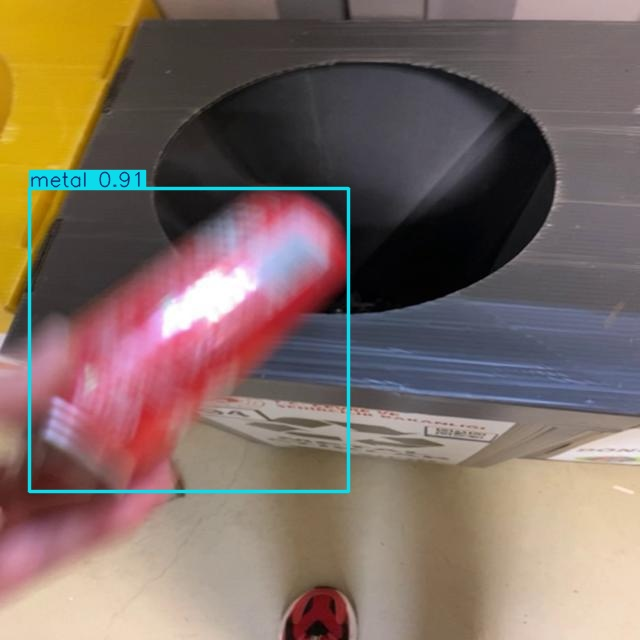

Displaying: 63971668873496397166887351_frame3_jpg.rf.066bc5f3b8c01d5a7b68b2dddafc4ec8.jpg


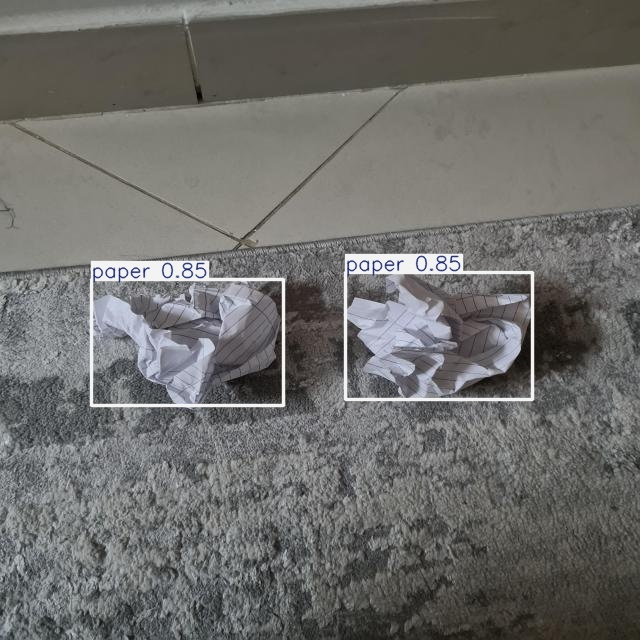

Displaying: 20220216_190933_jpg.rf.7b6439a5e6153bc047a48ad7b34c1bdf.jpg


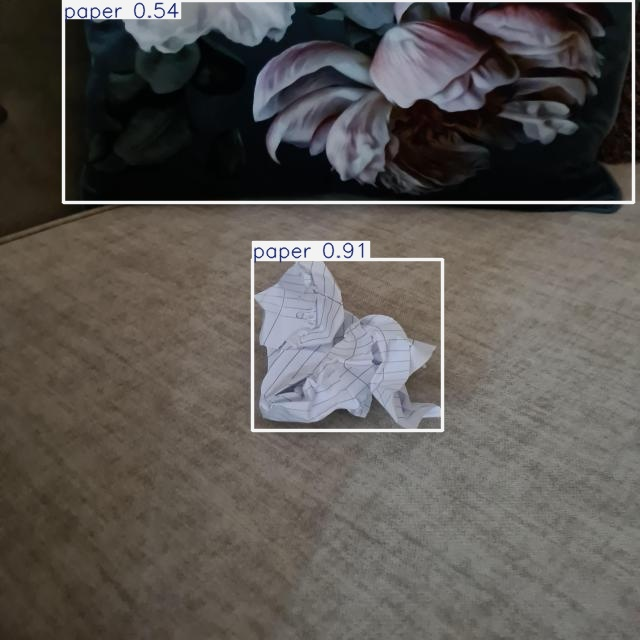

Displaying: 20220216_203540_jpg.rf.84cb0f7152b30455a51425646a38372c.jpg


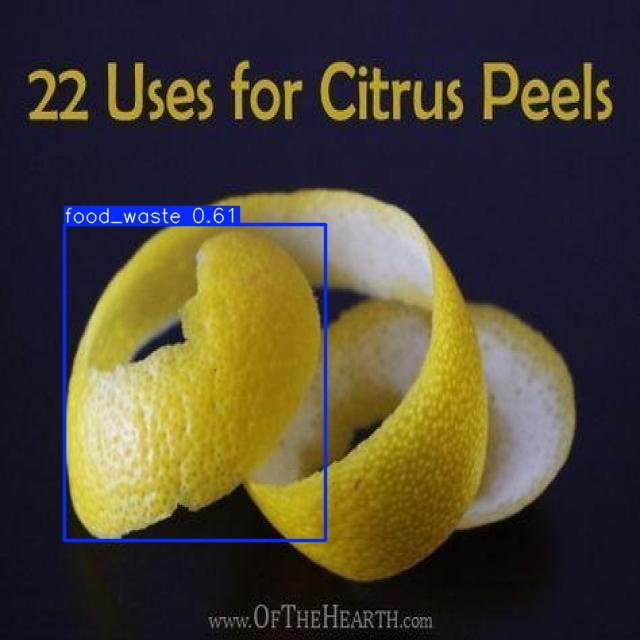

Displaying: 0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.41bddabf8df971c84f905cb7710428b5.jpg


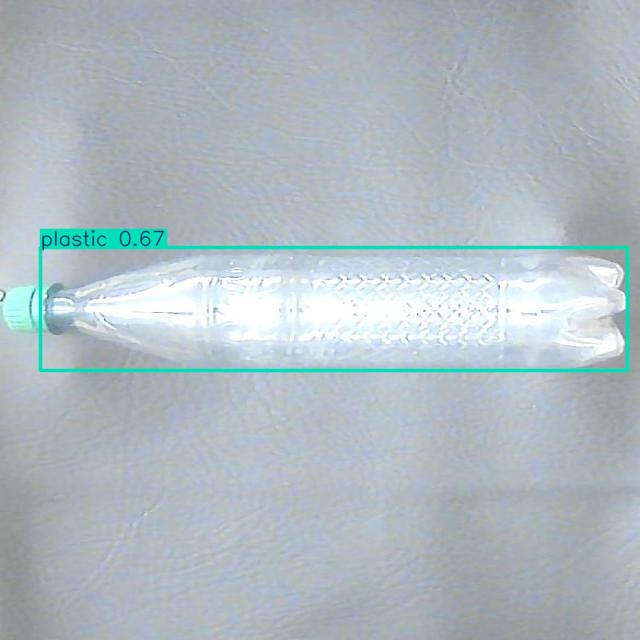

Displaying: cropped_pb_157_jpg.rf.8f176ad411608c9a2b89b2c8c2ccf61a.jpg


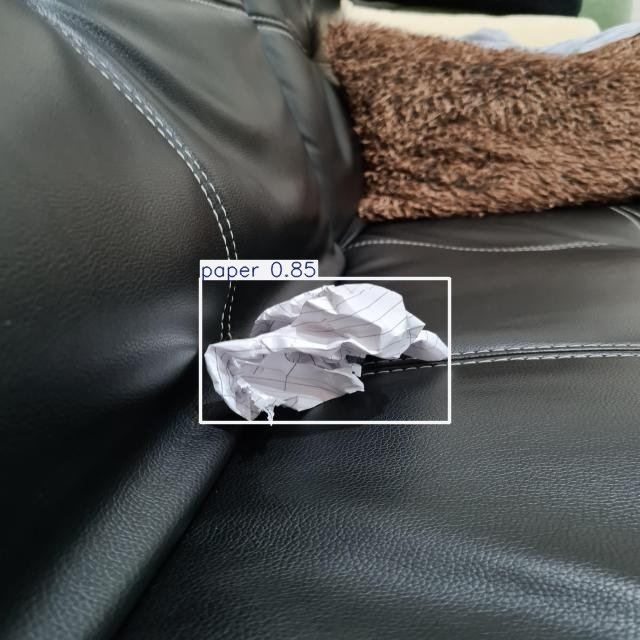

Displaying: 20220216_203647_jpg.rf.a2f4f6b9e63803754be505c456a3802c.jpg


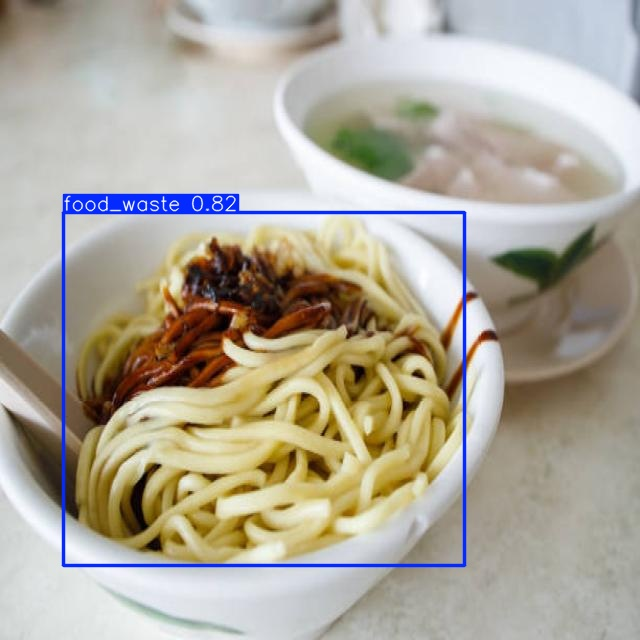

Displaying: istockphoto-1166957114-612x612_jpg.rf.2e2f69f7971ab001bd80f037fdd1126f.jpg


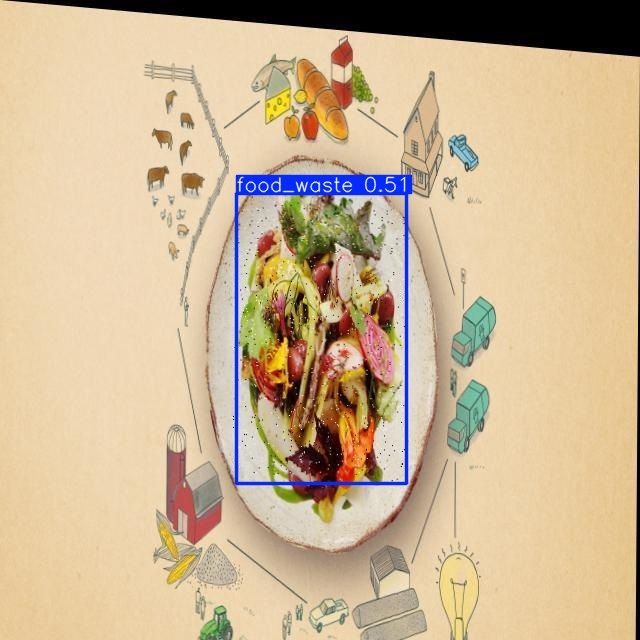

Displaying: cf30d63dca93f90e23fea9aa467e16312dc2bcbad8c5de42ddcdef9c9af8d0c9-_RI__jpg.rf.2ba0db564aa764e0d6ae1e57e28c8806.jpg


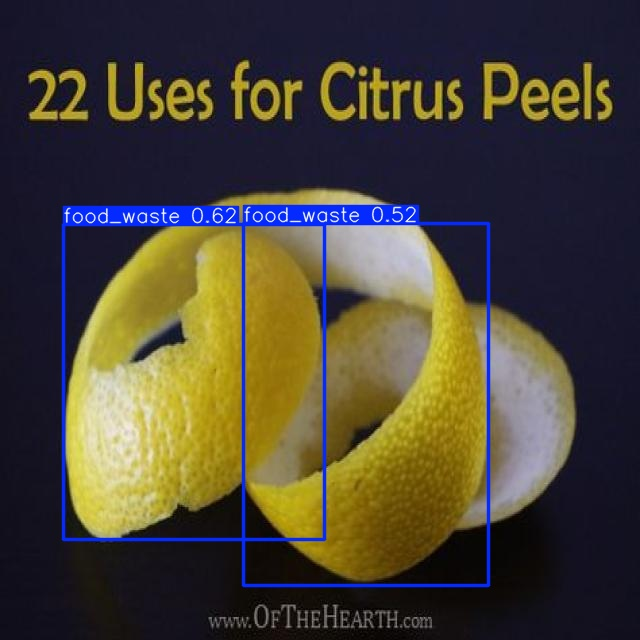

Displaying: 0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.808268822cd0ee4cf52579c0a589bb0f.jpg


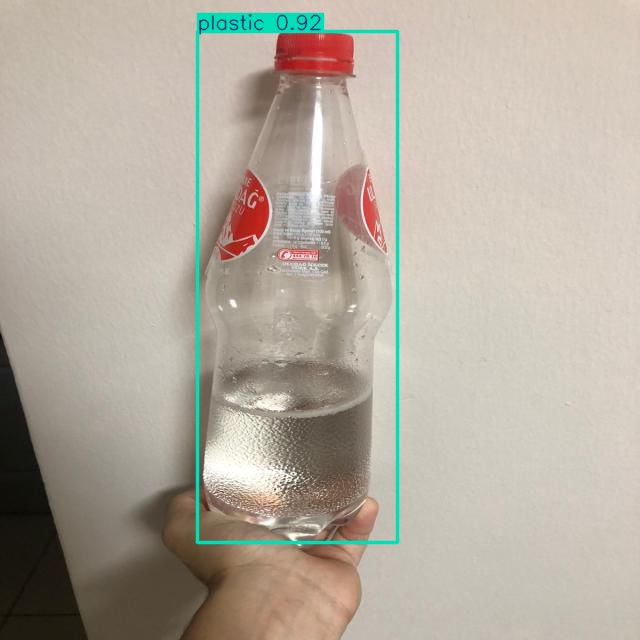

Displaying: IMG-20241216-WA0114_jpg.rf.84f6aa95df34611cea72af53b3a5217b.jpg


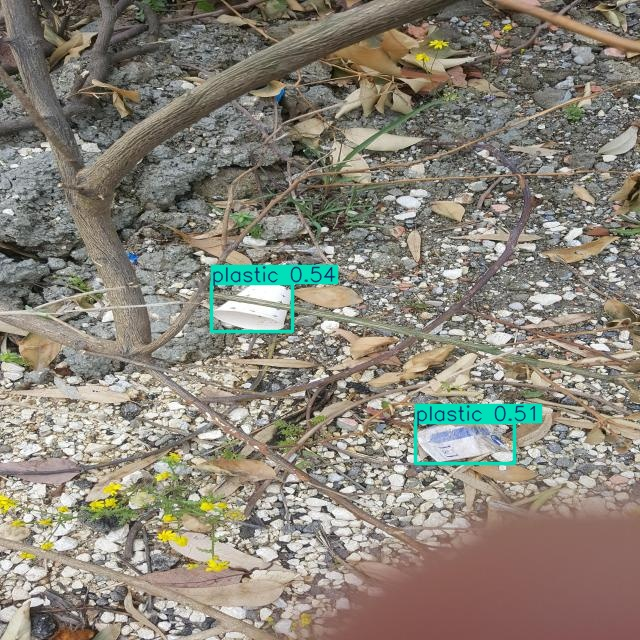

Displaying: batch_12_000035_jpg.rf.333f15e59314f2a5e2a47263a68d5265.jpg


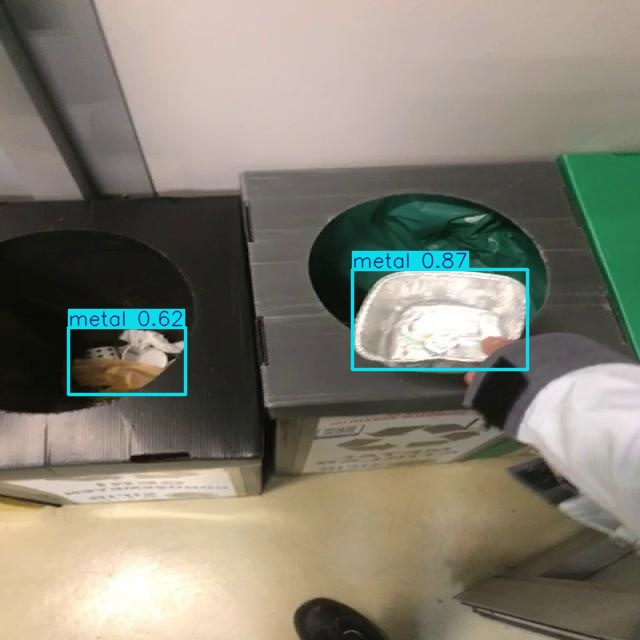

Displaying: 62bc37a7e064462bc37a7e064a_frame2_jpg.rf.f088debbb4ac40c20d91463e83c2c33e.jpg


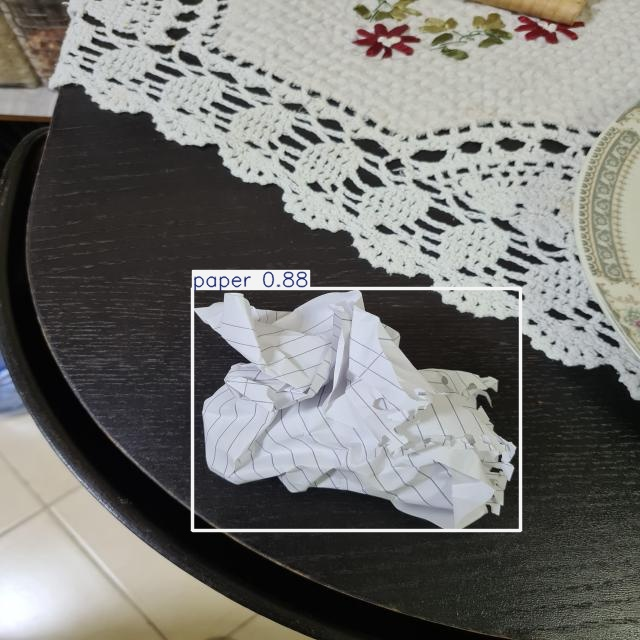

Displaying: 20220216_203414_jpg.rf.e393c08aeea1fa0d3be5b3a2d6c56577.jpg


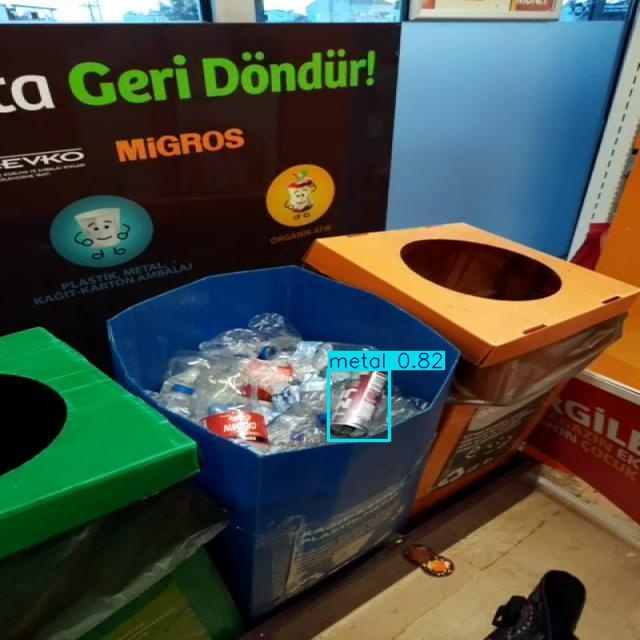

Displaying: 62b0acf7591de62b0acf7591e7_frame40_jpg.rf.72cda6ae8c3db97b67af43983ab5ad88.jpg


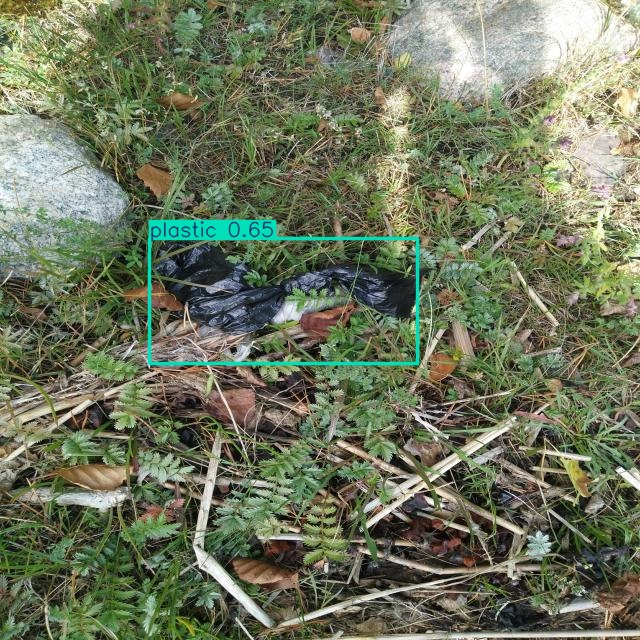

Displaying: batch_11_000044_jpg.rf.e92d82e7ab61f34da285e1a3a4755381.jpg


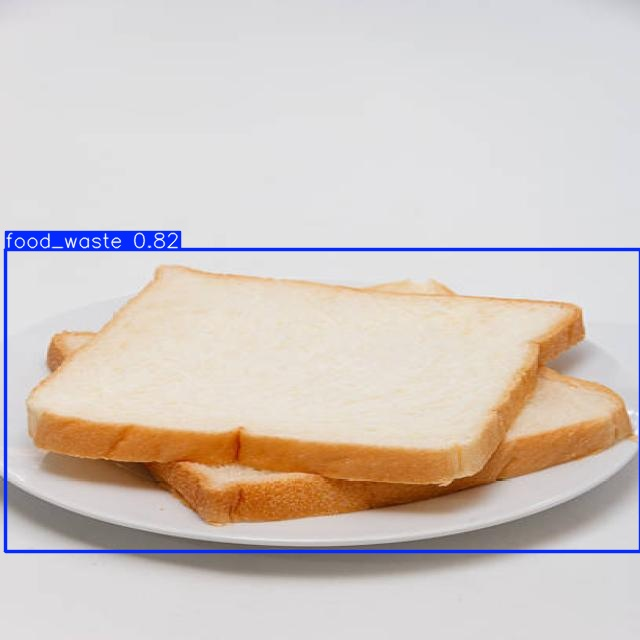

Displaying: 202220-3-_jpg.rf.ce714724ae8b98b86ee4d81b1b3d4ae7.jpg


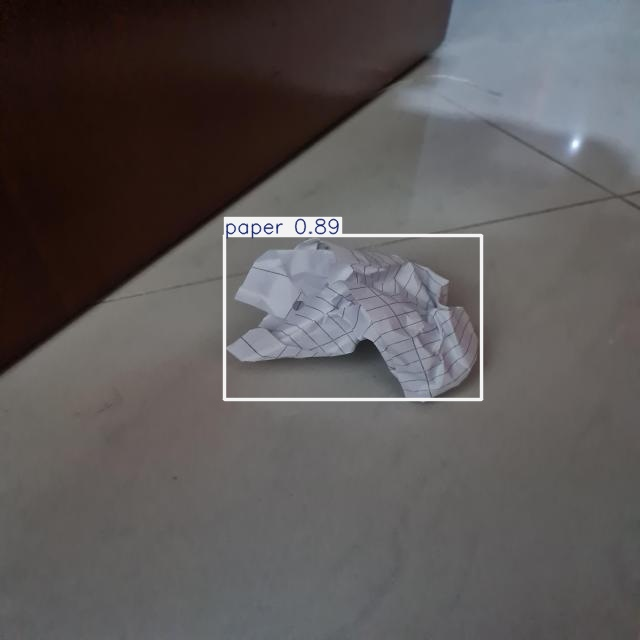

Displaying: 20220216_190731_jpg.rf.1ed69c4f98965fbdf2c057c249aef4c7.jpg


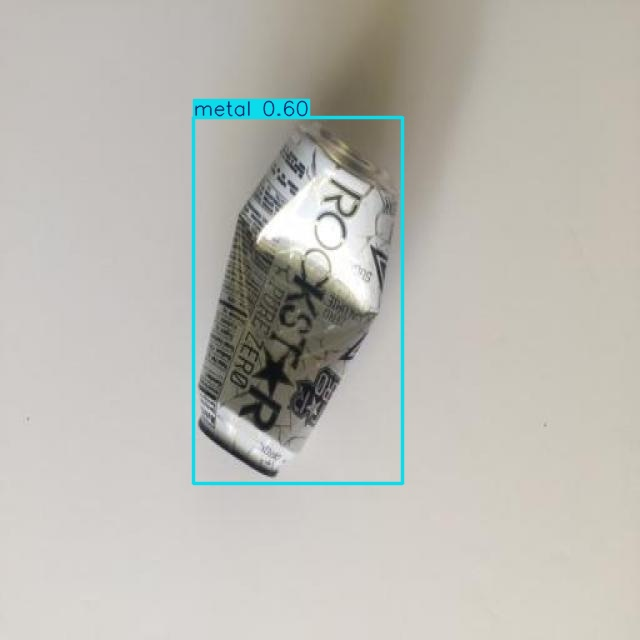

Displaying: AluCan3_jpg.rf.f1d37709b8af4d45aaf979bc07cdcc22.jpg


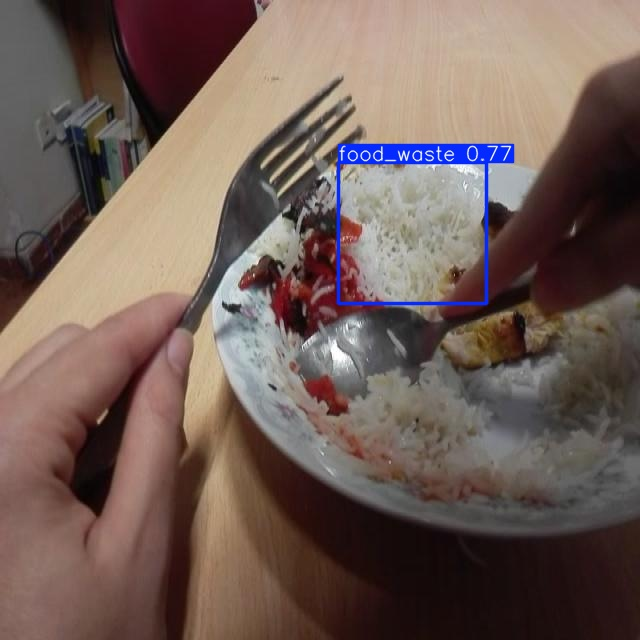

Displaying: VID_20230608_145626-088_jpg.rf.902a8a75ba4ea3631a719f15079ab47e.jpg


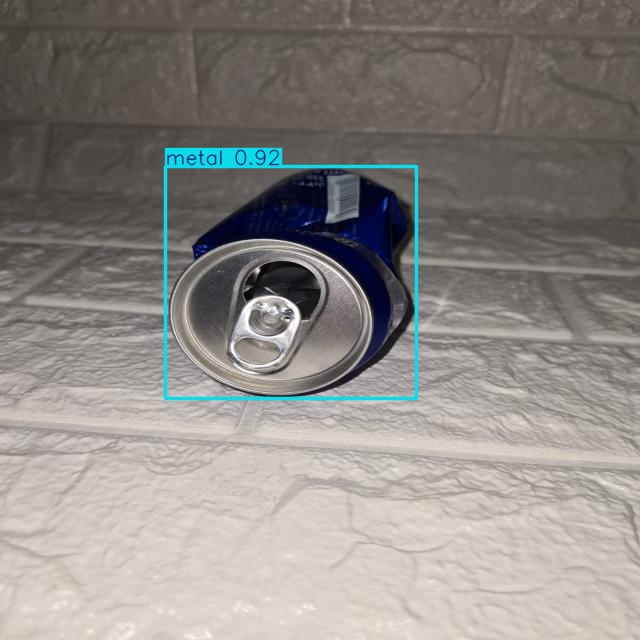

Displaying: 111_jpg.rf.a6b273dc78ea523581749f242211a2a3.jpg


In [7]:
# Visualization of Testing Results
from IPython.display import Image, display
import os

pred_dir = "/kaggle/working/runs/detect/predict/"

pred_images = [f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.png', '.jpeg'))] # full paths to the resulting images

# Display first 20 predictions
for img_name in pred_images[:20]:
    img_path = os.path.join(pred_dir, img_name)
    display(Image(filename=img_path, width=600))
    print(f"Displaying: {img_name}")  # Optional: Show filename

In [8]:
# Zips only the /kaggle/working/runs directory and provides download link

import os
import zipfile
from IPython.display import FileLink, display

def zip_and_download_runs():
    source_dir = '/kaggle/working/runs'
    zip_name = 'runs_output.zip'
    
    if not os.path.exists(source_dir):
        print(f"Error: Directory {source_dir} not found!")
        return
        
    # Create zip file
    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(source_dir):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start='/kaggle/working')
                zipf.write(file_path, arcname)
                print(f"Added: {arcname}")
    
    # Verify zip was created
    if os.path.exists(zip_name):
        print(f"\nSuccess! Zip file created: {os.path.getsize(zip_name)/1024/1024:.2f} MB")
        print("Download link:")
        display(FileLink(zip_name))
    else:
        print("Failed to create zip file")

# Execute
zip_and_download_runs()

Added: runs/detect/predict/63971668873496397166887351_frame3_jpg.rf.066bc5f3b8c01d5a7b68b2dddafc4ec8.jpg
Added: runs/detect/predict/20220216_190933_jpg.rf.7b6439a5e6153bc047a48ad7b34c1bdf.jpg
Added: runs/detect/predict/20220216_203540_jpg.rf.84cb0f7152b30455a51425646a38372c.jpg
Added: runs/detect/predict/0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.41bddabf8df971c84f905cb7710428b5.jpg
Added: runs/detect/predict/cropped_pb_157_jpg.rf.8f176ad411608c9a2b89b2c8c2ccf61a.jpg
Added: runs/detect/predict/20220216_203647_jpg.rf.a2f4f6b9e63803754be505c456a3802c.jpg
Added: runs/detect/predict/istockphoto-1166957114-612x612_jpg.rf.2e2f69f7971ab001bd80f037fdd1126f.jpg
Added: runs/detect/predict/cf30d63dca93f90e23fea9aa467e16312dc2bcbad8c5de42ddcdef9c9af8d0c9-_RI__jpg.rf.2ba0db564aa764e0d6ae1e57e28c8806.jpg
Added: runs/detect/predict/0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.808268822cd0ee4cf52579c0a589bb0f.jpg
Added: runs/detect/predict/IMG-20241216-WA0114_jpg.rf.84f6aa95df34611cea72a

/kaggle/working/runs_output.zip